# Sumário

[Introdução](#Introdução)

[Função de Custo](#Função-de-Custo)

[Regressão Logística](#Regressão-Log%C3%ADstica)

[Exercícios](#Exercícios)

[Referências](#Referências)

# Imports e Configurações

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Introdução

A __Regressão Logística__, apesar do nome, é uma técnica utilizada para fazer __classificação binária__. Nesse caso, ao invés de prever um valor contínuo, a nossa __saída é composta de apenas dois valores: 0 ou 1__, em geral. Para fazer a regressão logística, utilizamos como função de ativação a função conhecida como __sigmoid__. Tal função, é descrita pela seguinte fórmula:

$$\widehat{y} = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z}$$

No caso de redes neurais, em geral consideramos $z(w,b) = xw^T + b$.

# Função de Custo

A função de custo da regressão logística é chamada de __entropia cruzada__ (do inglês, __cross-entropy__) e é definida pela seguinte fórmula:

$$J(z) = -\frac{1}{N}\sum_{i}^N y_i\log(\widehat{y}_i) + (1-y_i)\log(1-\widehat{y}_i)$$

Onde $N$ é quantidade de amostras e $y_i$ representa o valor da $i$-ésima amostra (0 ou 1). Lembrando que $\widehat{y}_i$ é agora calculada agora utilizando a função ___sigmoid___, como mostrado na seção anterior.

Repare também que:

- quando $y_i = 0$, o primeiro termo anula-se (pois $y_i = 0$). Logo, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$ no segundo termo da equação ($(1-y_i)\log(1-\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(1-\widehat{y}_i) = \log(1) = 0$. Logo, o nosso custo $J = 0$. Repare que isso faz todo sentido, pois $y_i = 0$ e $\widehat{y}_i = 0$. 
    - quando $\widehat{y}_i = 1$, temos que o $\log(1-\widehat{y}_i) = \log(0) = \infty$. Agora, o nosso custo $J = \infty$. Ou seja, quanto mais diferente são $y_i$ e $\widehat{y}_i$, maior o nosso custo.
- quando $y_i = 1$, o segundo termo anula-se (pois $(1-y_i) = 0$). Novamente, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$, só que agora no primeiro termo da equação ($y_i\log(\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(\widehat{y}_i) = \infty$. Logo, o nosso custo $J = \infty$. Novamente, como $y_i$ e $\widehat{y}_i$ são bem diferentes, o custo tende a aumentar.
    - quando $\widehat{y}_i = 1$, temos que $\log(\widehat{y}_i) = \log(1) = 0$. Agora, o nosso custo $J = 0$. Novamente, isso faz todo sentido, pois $y_i = 1$ e $\widehat{y}_i = 1$.


## Derivada da Cross-Entropy

Para calcular a derivada da nossa função de custo $J(z)$, primeiramente vamos calcular $\log(\widehat{y}_i)$:

$$\log(\widehat{y}_i) = log\frac{1}{1+e^{-z}} = log(1) - log(1+e^{-z}) = -log(1+e^{-z})$$

E $\log(1-\widehat{y}_i)$:

$$\log(1-\widehat{y}_i) = log \left(1-\frac{1}{1+e^{-z}}\right) = log(e^{-z}) - log(1+e^{-z}) = -z -log(1+e^{-z})$$

Substituindo as duas equações anteriores na fórmula da função de custo, temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[-y_i\log(1+e^{-z}) + (1-y_i)(-z -\log(1+e^{-z}))\right]$$

Efetuando as distribuições, podemos simplificar a equação acima para:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -z -\log(1+e^{-z})\right]$$

Uma vez que:

$$-z -\log(1+e^{-z}) = -\left[\log e^{z} + log(1+e^{-z})\right] = -log(1+e^z)$$

Temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -\log(1+e^z)\right]$$

Como a derivada da diferença é igual a diferença das derivadas, podemos calcular cada derivada individualmente em relação a $w$:

$$\frac{\partial}{\partial w_i}y_iz = y_ix_i,\quad \frac{\partial}{\partial w_i}\log(1+e^z) = \frac{x_ie^z}{1+e^z} = x_i \widehat{y}_i$$

e em relação à $b$:

$$\frac{\partial}{\partial b}y_iz = y_i,\quad \frac{\partial}{\partial b}\log(1+e^z) = \frac{e^z}{1+e^z} = \widehat{y}_i$$

Assim, a derivada da nossa função de custo $J(z)$ é:

$$\frac{\partial}{\partial w_i}J(z) = \sum_i^N (y_i - \widehat{y}_i)x_i$$

$$\frac{\partial}{\partial b}J(z) = \sum_i^N (y_i - \widehat{y}_i)$$

Por fim, repare que o __gradiente de J ($\nabla J$) é exatamente o mesmo que o gradiente da função de custo do [Perceptron Linear](Perceptron.ipynb#Como-o-Perceptron-Aprende?)__. Portanto, os pesos serão atualizados da mesma maneira. O que muda é a forma como calculamos $\widehat{y}$ (agora usando a função _sigmoid_) e a função de custo $J$.

# Regressão Logística

In [20]:
df = pd.read_csv('data/anuncios.csv')
print(df.shape)
df.head()

(400, 3)


,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [21]:
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


Text(0, 0.5, 'comprou?')

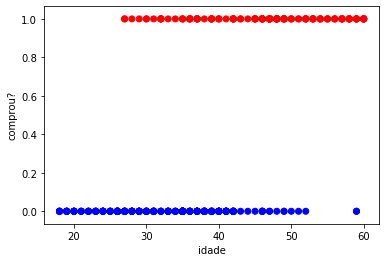

In [22]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [23]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999996


Vamos utilizar o _sklearn_ como gabarito para nossa implementação. Entretanto, como a Regressão Logística do _sklearn_ faz uma __regularização L2__ automaticamente, temos de definir $C=10^{15}$ para "anular" a regularização. O parâmetro $C$ define a inversa da força da regularização (ver [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). __Logo, quanto menor for o $C$, maior será a regularização e menores serão os valores dos pesos e bias.__

In [24]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[3.96794251]] [-0.67510634]
0.84


Text(0, 0.5, 'comprou?')

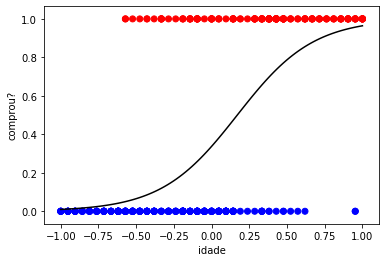

In [7]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = clf_sk.predict_proba(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [8]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

## Numpy 

In [9]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1
learning_rating = 1e-3

for step in range(1001):
    z = np.dot(x,w.T)+b
    y_pred = sigmoid(z)
    error = y - y_pred
    
    w = w + learning_rating*np.dot(error.T, x)
    b = b + learning_rating*error.sum()
    
    if step % 100 == 0:
        cost = np.mean(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))
        print('step {0}: {1}'.format(step, cost))
        
print('w: ', w)
print('b: ', b)

step 0: 0.8996550641692238
step 100: 0.4413285008531513
step 200: 0.4241572085586418
step 300: 0.42124048310519113
step 400: 0.42056809936645906
step 500: 0.42039349445714963
step 600: 0.4203455757498874
step 700: 0.4203320561035592
step 800: 0.4203281865950985
step 900: 0.4203270706627744
step 1000: 0.420326747533879
w:  [[3.96383426]]
b:  -0.6748149957315935


In [25]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = clf_sk.predict_proba(x_test)
y_pred = sigmoid(np.dot(x_test, w.T) + b)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black', linewidth=7.0)
plt.plot(x_test, y_pred, color='yellow')
plt.xlabel('idade')
plt.ylabel('comprou?')

ValueError: shapes (100,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [26]:
print('Acurácia pelo Scikit-learn: {:.2f}%'.format(clf_sk.score(x, y)*100))

y_pred = np.round(sigmoid(np.dot(x, w.T) + b))
print('Acurária pela nossa implementação: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

Acurácia pelo Scikit-learn: 84.00%


ValueError: shapes (400,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

# Exercícios

In [27]:
x, y = df[['idade', 'salario']].values, df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 2) (400, 1)


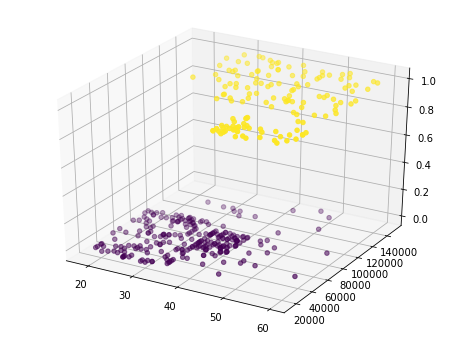

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())

In [29]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [30]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[4.90326048 2.42329814]] [-0.36607923]
0.845


## Numpy

In [31]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1x2]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-3 # <- tente estimar a learning rate

for step in range(1001): # <- tente estimar a #epochs
    z = np.dot(x,w.T)+b
    y_pred = sigmoid(z)
    error = y - y_pred
    
    w = w + learning_rating*np.dot(error.T, x)
    b = b + learning_rating*error.sum()
    
    if step % 100 == 0:
        cost = np.mean(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 0.6248945174297414
step 100: 0.37949160562610956
step 200: 0.3572309173398064
step 300: 0.3509223019783832
step 400: 0.34847994858865305
step 500: 0.3473935021757616
step 600: 0.3468717567609177
step 700: 0.3466090944576098
step 800: 0.3464727017134608
step 900: 0.3464003621419562
step 1000: 0.34636142129033937
w:  [[4.80162565 2.37401187]]
b:  -0.3671524977100404


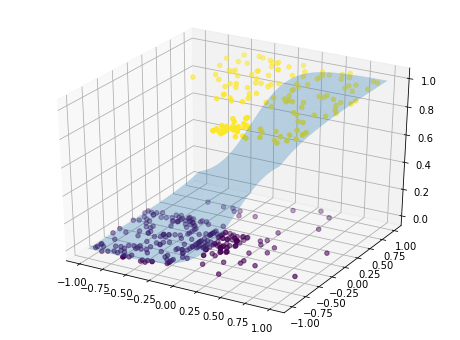

In [32]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max())
x2 = np.linspace(x[:, 1].min(), x[:, 1].max())
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x1_mesh = x1_mesh.reshape(-1, 1)
x2_mesh = x2_mesh.reshape(-1, 1)

x_mesh = np.hstack((x1_mesh, x2_mesh))
y_pred = sigmoid(np.dot(x_mesh, w.T) + b)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
ax.plot_trisurf(x1_mesh.ravel(), x2_mesh.ravel(), y_pred.ravel(), alpha=0.3, shade=False)

In [33]:
print('Acurácia pelo Scikit-learn: {:.2f}%'.format(clf_sk.score(x, y)*100))

y_pred = np.round(sigmoid(np.dot(x, w.T) + b))
print('Acurária pela nossa implementação: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

Acurácia pelo Scikit-learn: 84.50%
Acurária pela nossa implementação: 84.50%


# Referências

1. [Logistic Regression from Scratch in Python](https://beckernick.github.io/logistic-regression-from-scratch/)
2. [Derivative of cost function for logistic Regression](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)